In [1]:
#import libraries
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib
from matplotlib import pyplot
%matplotlib inline
import numpy

Using TensorFlow backend.


In [2]:
import glob

In [28]:
import pandas as pd
reading_dates=pd.date_range('2011-01-01',freq='W',periods=28)
print(reading_dates)

DatetimeIndex(['2011-01-02', '2011-01-09', '2011-01-16', '2011-01-23',
               '2011-01-30', '2011-02-06', '2011-02-13', '2011-02-20',
               '2011-02-27', '2011-03-06', '2011-03-13', '2011-03-20',
               '2011-03-27', '2011-04-03', '2011-04-10', '2011-04-17',
               '2011-04-24', '2011-05-01', '2011-05-08', '2011-05-15',
               '2011-05-22', '2011-05-29', '2011-06-05', '2011-06-12',
               '2011-06-19', '2011-06-26', '2011-07-03', '2011-07-10'],
              dtype='datetime64[ns]', freq='W-SUN')


In [32]:
path='csv/'
files=glob.glob("csv/*.csv")
data=[]
names=[]
for file in files:
    df=read_csv(file,header=None,names=['Av','Mx_rt','Mn_rt','Avg_rt','th'])
    df['R_dates']=reading_dates
    names.append(file)
    data.append(df)

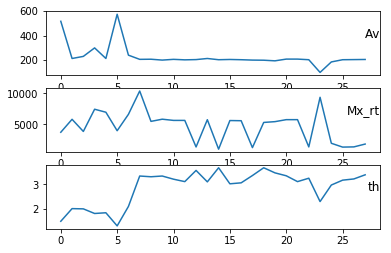

In [34]:
values=data[35].values
groups = [0, 1, 4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(data[50].columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [33]:
data

[    Av  Mx_rt   Mn_rt  Avg_rt    th    R_dates
 0   41    764   95.79     290  4.82 2011-01-02
 1   40    791   83.36     287  4.71 2011-01-09
 2   40    425   83.97     302  4.97 2011-01-16
 3   40   1399   75.30     284  4.69 2011-01-23
 4   39   1555   78.27     298  4.79 2011-01-30
 5   40    695   82.64     309  5.03 2011-02-06
 6   41    619   96.44     274  4.54 2011-02-13
 7   40    666   76.60     298  4.81 2011-02-20
 8   40    652   77.44     276  4.59 2011-02-27
 9   40    370   65.84     265  4.38 2011-03-06
 10  39   1225   93.11     281  4.54 2011-03-13
 11  39    450   77.52     312  5.12 2011-03-20
 12  50   1461  117.30     263  4.33 2011-03-27
 13  49    570   90.32     319  5.30 2011-04-03
 14  48   1402  112.43     281  4.60 2011-04-10
 15  48   1064   82.93     276  4.48 2011-04-17
 16  48   1079   86.72     279  4.62 2011-04-24
 17  48   1493   89.21     261  4.24 2011-05-01
 18  51    438  131.93     272  4.49 2011-05-08
 19  48    729   96.29     277  4.50 201